<a href="https://colab.research.google.com/github/RafsanJany-44/ACM/blob/master/SHAP_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install shap
!pip install interpret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import shap
import sklearn
from sklearn.preprocessing import LabelEncoder
data = 'https://raw.githubusercontent.com/RafsanJany-44/Thesis_Project/main/All_DATA/without_sn_and_Epoch/EEG_HMC.csv'
dataset = pd.read_csv(data)
encoder=LabelEncoder()
dataset["Sleep Stage"]=encoder.fit_transform(dataset["Sleep Stage"])
shap.initjs()
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]

dataset.head()

,Sleep Stage,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,Spectral Edge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,MeanF_Beta_F4,Spectral Edge_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,Spectral Edge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,Spectral Edge_Gamma_O2,PeakF_Gamma_O2
0,4,0.00051,8.74146,18.48195,17.48293,8.24195,0.00071,19.73073,29.84585,33.84195,...,0.00724,0.74927,3.87122,1.99805,0.87415,0.000210,35.21561,42.20878,49.95122,49.95122
1,4,0.00040,10.24000,17.48293,16.85854,10.61463,0.00051,17.23317,26.34927,29.34634,...,0.00723,0.49951,3.74634,1.24878,0.49951,0.000095,34.34146,43.33268,49.95122,49.95122
2,4,0.00036,9.74049,17.98244,17.48293,8.74146,0.00047,17.60780,25.47512,28.22244,...,0.00230,0.62439,5.24488,2.12293,0.62439,0.000074,34.59122,45.95512,49.95122,49.95122
3,4,0.00035,10.11512,17.60780,17.10829,9.61561,0.00047,17.35805,26.47415,28.72195,...,0.00091,0.87415,6.61854,3.12195,0.62439,0.000082,32.46829,43.95707,49.95122,49.95122
4,4,0.00033,9.74049,17.60780,17.23317,8.11707,0.00043,17.23317,25.84976,28.09756,...,0.00175,0.49951,5.74439,2.24780,0.49951,0.000077,33.59220,44.83122,49.95122,49.95122


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [4]:
X100 = shap.utils.sample(X_train, 100)

In [5]:
model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
print("Model coefficients:\n")
for i in range(X_train.shape[1]):
    print(X_train.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

MeanP_Alpha_F4 = -174.25301
MedianF_Alpha_F4 = 0.01353
MeanF_Alpha_F4 = 0.05006
Spectral Edge_Alpha_F4 = 9e-05
PeakF_Alpha_F4 = -0.01997
MeanP_Beta_F4 = 172.35823
MedianF_Beta_F4 = 0.01271
MeanF_Beta_F4 = -0.00914
Spectral Edge_Beta_F4 = 0.0127
PeakF_Beta_F4 = -0.00528
MeanP_Theta_F4 = 17.83983
MedianF_Theta_F4 = -0.03529
MeanF_Theta_F4 = -0.02026
Spectral Edge_Theta_F4 = -0.09603
PeakF_Theta_F4 = 0.01519
MeanP_Delta_F4 = -0.62696
MedianF_Delta_F4 = -0.43091
MeanF_Delta_F4 = -0.16171
Spectral Edge_Delta_F4 = 0.20705
PeakF_Delta_F4 = -0.10636
MeanP_Gamma_F4 = -42.65511
MedianF_Gamma_F4 = 0.00467
MeanF_Gamma_F4 = -0.00894
Spectral Edge_Gamma_F4 = 0.01967
PeakF_Gamma_F4 = -0.00388
MeanP_Alpha_C4 = -13.02379
MedianF_Alpha_C4 = 0.00077
MeanF_Alpha_C4 = -0.02282
Spectral Edge_Alpha_C4 = 0.02076
PeakF_Alpha_C4 = -0.00351
MeanP_Beta_C4 = -17.1461
MedianF_Beta_C4 = 0.00688
MeanF_Beta_C4 = -0.00674
Spectral Edge_Beta_C4 = 0.01363
PeakF_Beta_C4 = -0.00658
MeanP_Theta_C4 = 22.

To understand a feature’s importance in a model it is necessary to understand both how changing that feature impacts the model’s output, and also the distribution of that feature’s values. To visualize this for a linear model we can build a classical partial dependence plot and show the distribution of feature values as a histogram on the x-axis:

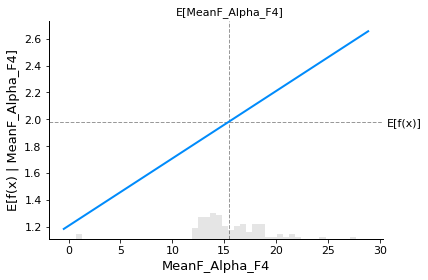

In [7]:
shap.partial_dependence_plot(
    "MeanF_Alpha_F4", model.predict, X100, ice=False,
    model_expected_value=True, feature_expected_value=True
)

Permutation explainer: 32537it [29:02, 18.64it/s]                           


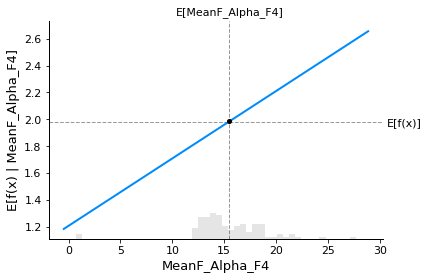

In [8]:

explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X_test)

sample_ind = 20               
shap.partial_dependence_plot(
    "MeanF_Alpha_F4", model.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]
)

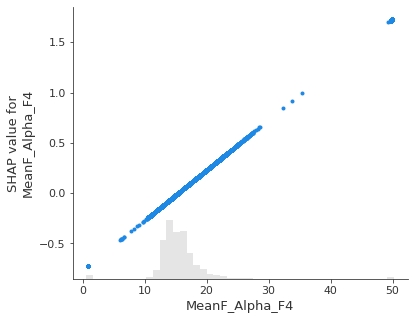

In [9]:
shap.plots.scatter(shap_values[:,"MeanF_Alpha_F4"])

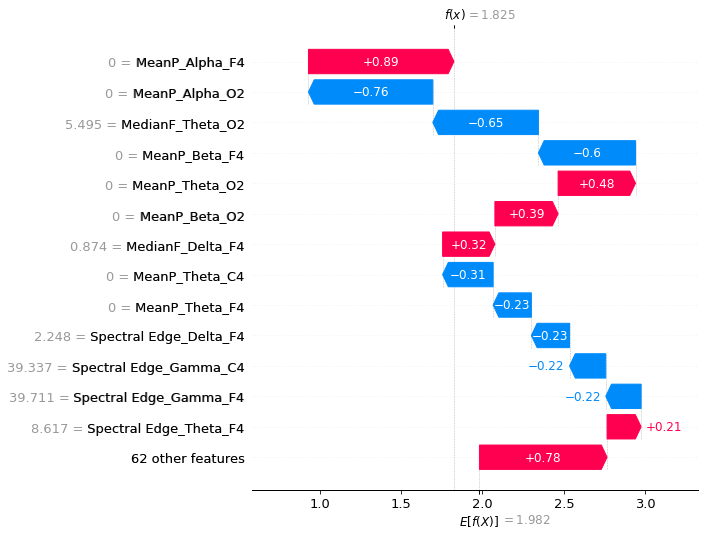

In [10]:
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

Permutation explainer: 32537it [1:37:38,  5.54it/s]


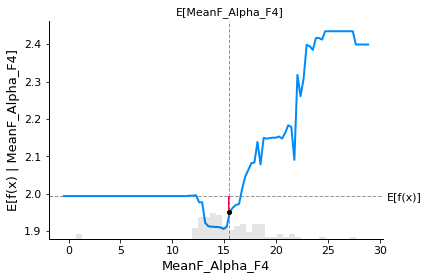

In [11]:
import interpret.glassbox
model_ebm = interpret.glassbox.ExplainableBoostingRegressor(interactions=0)
model_ebm.fit(X_train, y_train)

# explain the GAM model with SHAP
explainer_ebm = shap.Explainer(model_ebm.predict, X100)
shap_values_ebm = explainer_ebm(X_test)

# make a standard partial dependence plot with a single SHAP value overlaid
fig,ax = shap.partial_dependence_plot(
    "MeanF_Alpha_F4", model_ebm.predict, X100, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False,
    shap_values=shap_values_ebm[sample_ind:sample_ind+1,:]
)